In [ ]:
## https://aspiresoftware.in/blog/rasa-nlu-intent-classification-using-different-pipeline/

In [ ]:
import sys

In [ ]:
#!{sys.executable} -m pip install  rasa[tensorflow]==0.1.1

In [ ]:
#!{sys.executable} -m pip install  pymongo

In [ ]:
#!{sys.executable} -m pip install  matplotlib

In [ ]:
#!{sys.executable} -m pip install  pandas

In [ ]:
#!{sys.executable} -m pip install  tensorflow==1.15

In [ ]:
#!{sys.executable} -m pip install spacy==2.3.5

In [ ]:
import spacy

In [ ]:
#!{sys.executable} -m spacy  download en

In [ ]:
nlp = spacy.load("en")

In [ ]:
import tensorflow
import requests

In [ ]:
# read the required libraries
import os
import pandas as pd
import matplotlib.pyplot as plt
from rasa_nlu.model import Trainer
from rasa_nlu.test import run_evaluation
from rasa_nlu import config
from rasa_nlu.training_data import load_data
import random
import time

In [ ]:
# read the data
data="./data/data.json"

In [ ]:
initial_data = pd.read_json(data)

In [ ]:
def select_examples(initial_data, nb_of_examples):
    """
    :param initial_data: rasa nlu data
    :param nb_of_examples: no of examples as a threshold on how do we need to split the data
    :return:training and testing dataframe after splitting the initial data
    """

    if nb_of_examples > len(initial_data["rasa_nlu_data"]["common_examples"]):
           nb_of_examples = len(initial_data["rasa_nlu_data"]["common_examples"])
    training_examples_list = []
    test_examples_list = []
    training_df = initial_data.copy()
    test_df = initial_data.copy()

    examples_df = pd.DataFrame.from_records(initial_data["rasa_nlu_data"]["common_examples"])
    serie_distOfExamples = examples_df["intent"].value_counts()/len(examples_df)
    for intent in serie_distOfExamples.index.values:
        n=int(serie_distOfExamples[intent]*nb_of_examples)
        l = examples_df[examples_df["intent"] == intent].index.values
        examples_samp = random.sample(list(l),n)
        training_examples_ids = random.sample(examples_samp,int(n*0.8))
        for ex_id in training_examples_ids:
            examples_samp.remove(ex_id)
        for index_train in training_examples_ids:
            training_examples_list.append(initial_data["rasa_nlu_data"]["common_examples"][index_train])
        for index_test in examples_samp:
            test_examples_list.append(initial_data["rasa_nlu_data"]["common_examples"][index_test])
            
    training_df["rasa_nlu_data"]["common_examples"] = training_examples_list
    test_df["rasa_nlu_data"]["common_examples"] = test_examples_list

    return training_df, test_df

In [ ]:
def construct_jsonExampleFile(training_df, test_df, initial_data):
    """
    :param training_df: training dataframe
    :param test_df: testing dataframe
    :return: None, writes both the dataframe into specified path
    """
    training_df.to_json('./data/training_data.json')
    test_df.to_json('./data/test_data.json')

In [ ]:
def examplesDist_plot(log_pd):
    """
    :param log_pd: data as the rasa nlu data,
    :return: None, calculate value count per intent and plots that using matplotlib
    """
    percent = pd.DataFrame.from_records(log_pd["rasa_nlu_data"]["common_examples"])["intent"].value_counts()
    percent.plot(kind='bar', figsize=(10,8))
    plt.ylabel("Number of examples per intent")
    plt.xlabel("Intents")
    plt.title("Number of examples per intent")
    plt.show()

In [ ]:
train,test=select_examples(initial_data,1000)
construct_jsonExampleFile(train,test,initial_data)

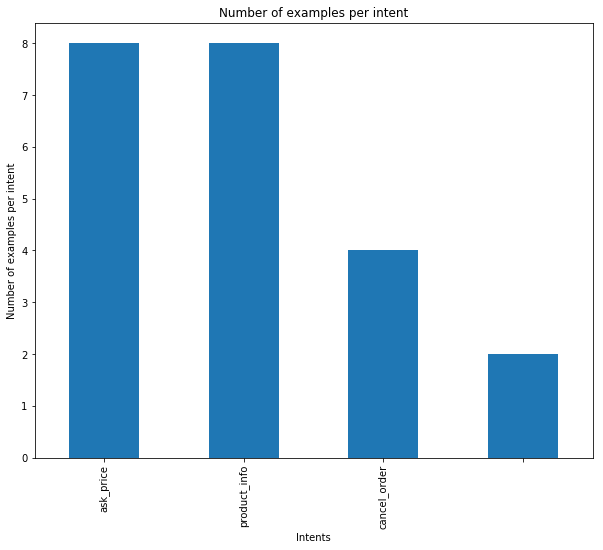

In [ ]:
training_data = pd.read_json("data/training_data.json")
examplesDist_plot(training_data)

In [ ]:
def trainModel(pipeline,model_dir):
    """
    :param pipeline: pipleine path to be loaded as the config in the Trainer
    :param model_dir: model dir where we need to store the model ,after training model using Trainer
    :return: model_dir where the trained model has been trained and saved.
    """
    path_to_data = "./data/training_data.json"
    training_data = load_data(path_to_data)
    trainer = Trainer(config.load(pipeline))
    interpreter = trainer.train(training_data)
    path_to_model = "./models/current/"+model_dir
    model_directory = trainer.persist(path_to_model)
    return model_directory

In [ ]:
def evaluateModel(pathToData, model_dir):
    path_to_data = "./data/test_data.json"

    if not os.path.exists(model_dir +"/evaluation"):
        os.mkdir(model_dir +"/evaluation")
        print("Directory ", "evaluation", " Created ")

    errors_path = model_dir + "/evaluation/errors.json"
    confmat_path = model_dir + "/evaluation/confmat"
    intent_hist_path = model_dir + "/evaluation/hist"
    run_evaluation(path_to_data, model_dir, errors_filename=errors_path, confmat_filename=confmat_path,
                   intent_hist_filename=intent_hist_path)


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Use keras.layers.dense instead.
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use keras.layers.dropout instead.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.


Epochs: 100%|██████████| 300/300 [00:01<00:00, 299.34it/s, loss=0.078, acc=1.000]


The training took  0.038927920659383136  mins for execution
/home/poonam/artivatic/freeTime/Chatbot/./models/current/./Tensorflow_embedings_model/default/model_20210720-175704
Directory  evaluation  Created 
Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from /home/poonam/artivatic/freeTime/Chatbot/./models/current/./Tensorflow_embedings_model/default/model_20210720-175704/component_4_EmbeddingIntentClassifier.ckpt


100%|██████████| 8/8 [00:00<00:00, 262.13it/s]


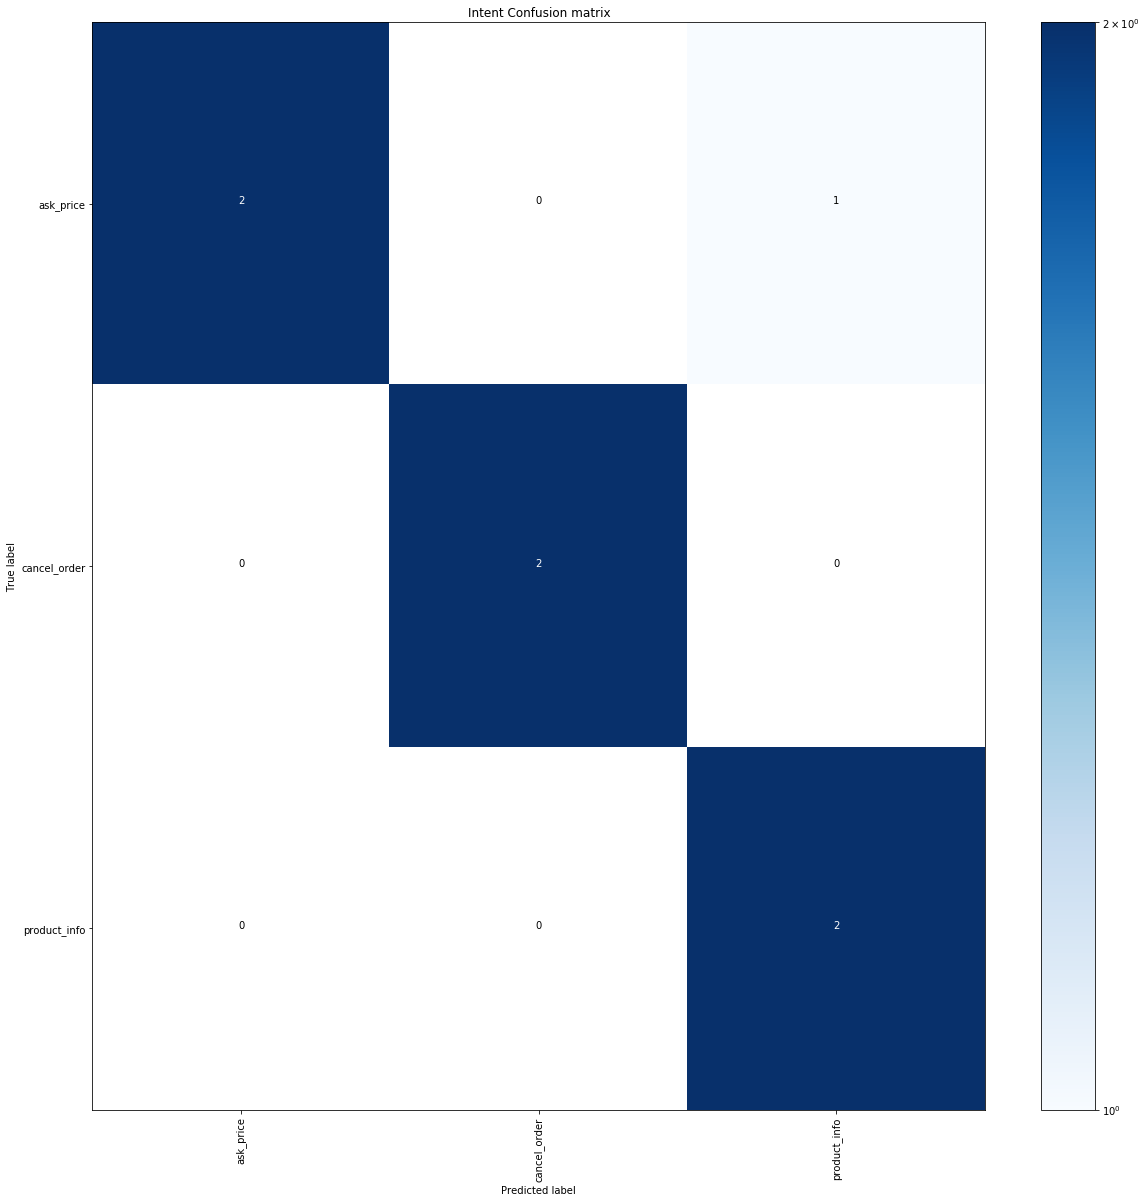

/home/poonam/artivatic/freeTime/Chatbot/venv/lib/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


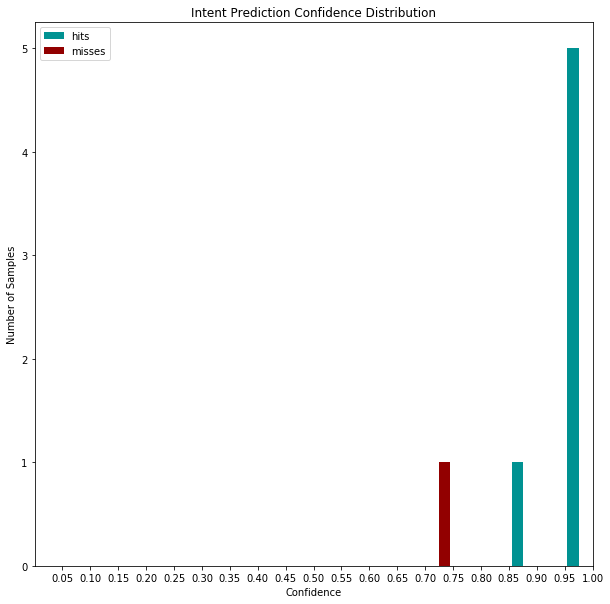

/home/poonam/artivatic/freeTime/Chatbot/venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/poonam/artivatic/freeTime/Chatbot/venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/poonam/artivatic/freeTime/Chatbot/venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [ ]:
start = time.time()
model_dir = trainModel("./data/Tensorflow.config.yml","./Tensorflow_embedings_model")
end = time.time()
print("The training took ", (end-start)/60, " mins for execution")

# evaluation of the model
print(model_dir)
evaluateModel("548_training_examples",model_dir)

Fitting 2 folds for each of 6 candidates, totalling 12 fits
The training took  0.011945732434590657  mins for execution
/home/poonam/artivatic/freeTime/Chatbot/./models/current/Spacy_model/default/model_20210720-181914
Directory  evaluation  Created 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.0s finished
100%|██████████| 8/8 [00:00<00:00, 203.32it/s]


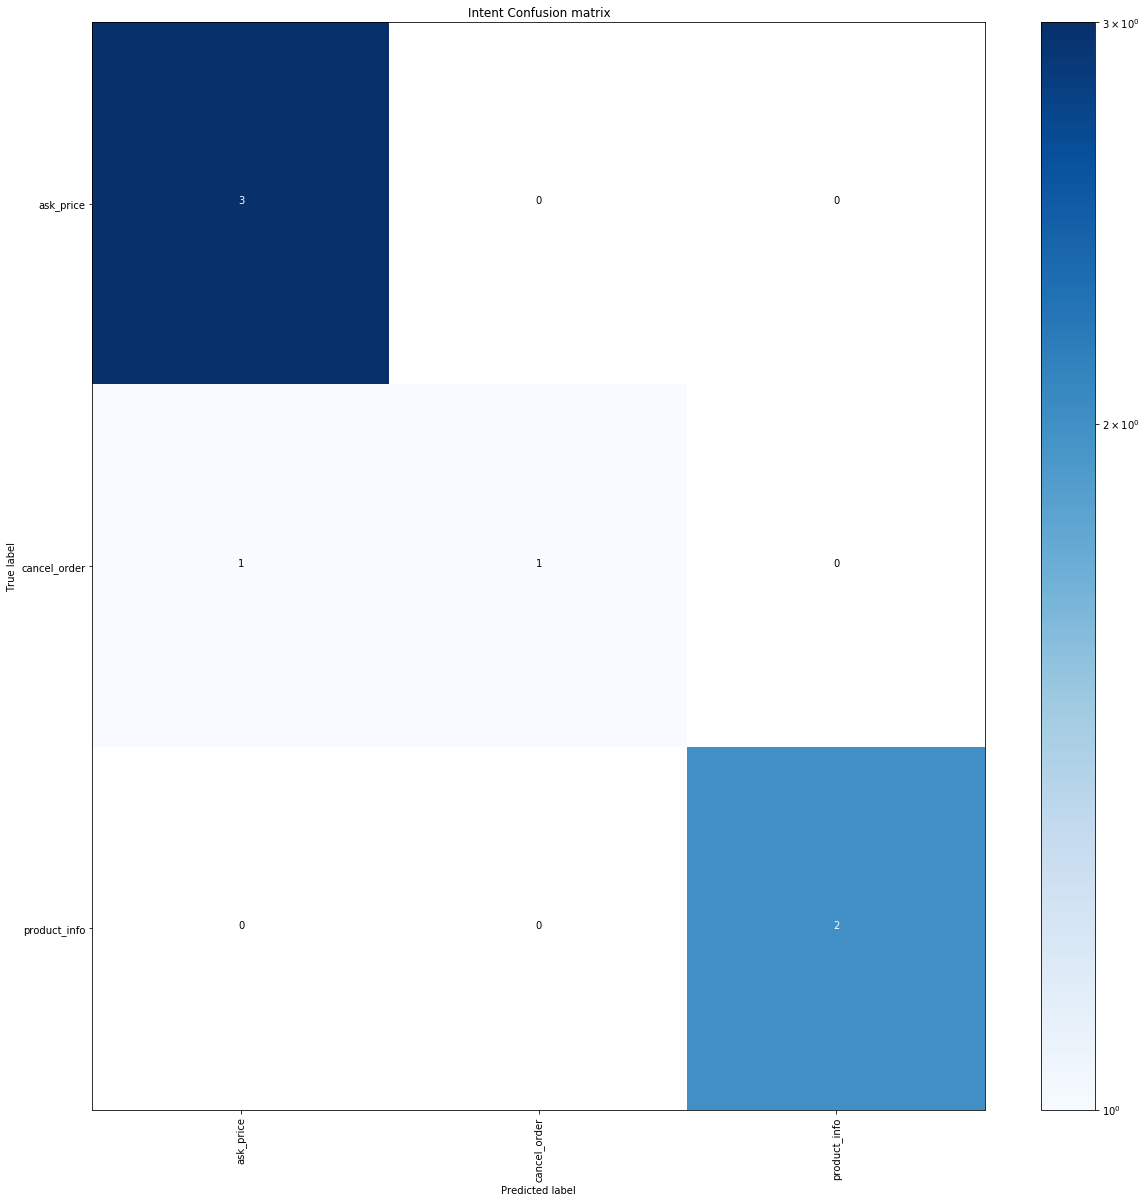

/home/poonam/artivatic/freeTime/Chatbot/venv/lib/python3.6/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


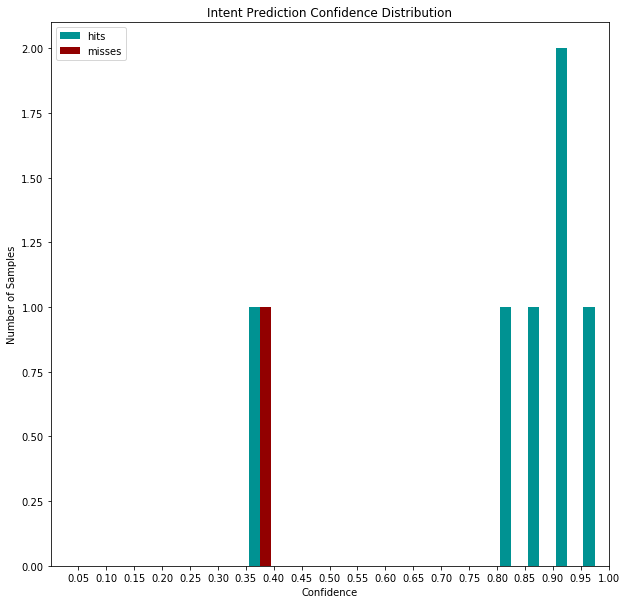

/home/poonam/artivatic/freeTime/Chatbot/venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/poonam/artivatic/freeTime/Chatbot/venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/poonam/artivatic/freeTime/Chatbot/venv/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [ ]:
start = time.time()
model_dir = trainModel("./data/spacy_config.yml","Spacy_model")
end = time.time()
print("The training took ", (end-start)/60, " mins for execution")
print(model_dir)
evaluateModel("548_training_examples",model_dir)

In [ ]:
from rasa_nlu.model import Metadata, Interpreter

In [ ]:
model_directory="./Chatbot/models/current/Spacy_model/default/model_20210720-181914"
interpreter = Interpreter.load(model_directory)

In [ ]:
print(interpreter.parse('Can you tell me about television'))

{'intent': {'name': 'product_info', 'confidence': 0.9556977935497557}, 'entities': [{'start': 22, 'end': 32, 'value': 'television', 'entity': 'product', 'confidence': 0.9790504381933471, 'extractor': 'CRFEntityExtractor'}], 'intent_ranking': [{'name': 'product_info', 'confidence': 0.9556977935497557}, {'name': 'cancel_order', 'confidence': 0.02240485174095824}, {'name': 'ask_price', 'confidence': 0.021897354709286006}], 'text': 'Can you tell me about television'}


In [ ]:
print(interpreter.parse('i live in Canada'))

{'intent': {'name': 'product_info', 'confidence': 0.8499041512210761}, 'entities': [{'start': 10, 'end': 16, 'value': 'canada', 'entity': 'location', 'confidence': 0.8702145631208607, 'extractor': 'CRFEntityExtractor'}], 'intent_ranking': [{'name': 'product_info', 'confidence': 0.8499041512210761}, {'name': 'cancel_order', 'confidence': 0.10010842505173441}, {'name': 'ask_price', 'confidence': 0.04998742372718988}], 'text': 'i live in Canada'}


In [ ]:
# connecting with MongoDB
from pymongo import MongoClient

In [ ]:
class IntentFlow:
    def __init__(self, client_id):
        """
        :param client_id: takes client id as parameter to store intent flow per client wise
        """
        self.mongo_client = MongoClient('localhost:27017')
        self.db = self.mongo_client.chatflowdb
        self.intent_table = self.db['chatflow']
        self.client_id = client_id

    def add_flows(self, flow):
        """
        :param flow: Inserts specified flow per client
        :return: None
        """
        self.intent_table.insert_one({
            "client_id": self.client_id,
            "flow": flow,
        })

    def resolve_api(self, url):
        """
        :param url: takes url, calls internally to resolve api as api
        :return: returns response from the request api
        """
        response = requests.request("GET", url)
        return response.text

    def extract_api(self, intent_name):
        """
        :param intent_name: intent name is the name of intent for which we need to extract api details
        :return: calls resolve api internally ,returns response from resolve api
        """
        response = self.intent_table.find_one({"client_id": self.client_id, "flow.intent": intent_name})
        api_url = response['flow']['api_data']['url']
        print(api_url,"api_url")
        response = self.resolve_api(api_url)
        return response

    def get_flows(self):
        """
        :return: returns flows associated with the given client id
        """
        response = self.intent_table.find({
            "client_id": self.client_id,

        })
        return list(response)

    def get_slots_by_intent(self, intent_name):
        """
        :param intent_name: intent names to which we need the slots
        :return: returns slots needs to be full filled before triggering api
        """
        response = self.intent_table.find_one({
            "client_id": self.client_id,
            "flow.intent": intent_name})
        slots = None
        if response:
            slots = response['flow']['entities']
        return slots
    
class ContextManager:
    def __init__(self, client_id, chat_id):
        """
        :param client_id: client id of the context
        :param chat_id: chat id to be stored ,so that the context stored is stored by chat for windows per client
        """
        self.mongo_client = MongoClient('localhost:27017')
        self.db = self.mongo_client.chatflowdb
        self.chat_session = self.db['chatsession']
        self.client_id = client_id
        self.chat_id = chat_id

    def get_context(self):
        """
        :return: returns context stored for a given chat_id
        """
        response = self.chat_session.find_one(
            {"chat_id": self.chat_id})
        return response

    def update_slots(self, intent=None, entity=None):
        """
        :param intent: intent to be updated for a given chat_id
        :param entity: entity to be updated for a given chat_id
        :return: None
        """
        if intent:
            self.chat_session.find_one_and_update(
                {"chat_id": self.chat_id},
                {"$set": {"intent": intent}},
                upsert=True
            )
        if entity:
            self.chat_session.find_one_and_update(
                {"chat_id": self.chat_id},
                {"$push": {"entity": entity}},
                upsert=True

            )

    def get_filled_slots(self):
        """
        :return: returns all the filled slots in the given context for a given chat_id
        """
        response = self.chat_session.find_one(
            {"chat_id": self.chat_id})
        filled_slots = None
        if response and "entity" in response:
            filled_slots = response['entity']
        return filled_slots

    def get_slots(self, intent_name):
        """
        :param intent_name: intent to be checked for a not-filled slots
        :return: slots which are not filled, first check the context and returns  slots are not filled
        """
        intent_flow_obj = IntentFlow(self.client_id)
        slots = intent_flow_obj.get_slots_by_intent(intent_name)

        if slots:
            filled_slots = self.get_filled_slots()
            not_filled_slots = [ent for ent in slots if ent['entity'] not in filled_slots]
            return not_filled_slots
        else:
            print("No flow found for this intent")


In [ ]:
def resolve_api(url):
    url = "https://dezyre.free.beeceptor.com/my/api/path"
    response = requests.request("GET", url)
    return response.json()

def process_message(message,client_id,chat_id):
    """
    :param message: chat message from the user ,to be processed by the ML models
    :param client_id: client id
    :param chat_id: chat id for storing context
    :return: returns response / prompt for the un - fulfilled slots defined for the given intent
    """
    """ take chat message,predicts from rasa nlu pipeline"""
    
    response = interpreter.parse(message)
    print(response,"response from rasa ")
    intent_pred = response['intent']['name']
    intent_conf = response['intent']['confidence']
    
    intent=None
    if intent_conf>0.90:
        intent=intent_pred
        
    entities_pred = response['entities']
    
    context_manager= ContextManager(client_id,chat_id)
    
    
    '''Check if there is an existing intent'''
    '''if yes, check predicted now is same or not, if same fine, if not, promt user , if they wants to change??''' ## TODO
    try:
        context = context_manager.get_context()
        print(context,"got context as this")
        if "intent" in context.keys():
            intent_context = context['intent']
            print(intent_context,"intent_context")
            print(intent,"intent predicted")
            if intent_context==intent:
                intent=intent_context
            else:
                if intent:
                    return "Do you want to change the intent?"
                else:
                    """it means there is no intnet now, so we will continue the intent in context"""
                    intent=intent_context
    except:
        """No context has been saved yet for this chat yet!! """
        print("updating context as intent",intent)
        if intent:
            context_manager.update_slots(intent=intent)


    if entities_pred:
        for each_ent in entities_pred:
            entity=each_ent['entity']
            value=each_ent['value']
            conf = each_ent['confidence']
            if conf >0.60:
                context_manager.update_slots(entity=entity)
    response=context_manager.get_slots(intent)
    if response:
        prompt_question=response[0]['prompt']
        return prompt_question
    else:
        intent_obj=IntentFlow(client_id)
        response = intent_obj.extract_api(intent)
        return response

In [ ]:
chat_id="0036"
client_id=4

In [ ]:
message = "Can you tell me about television ?"

In [ ]:
process_message(message,client_id,chat_id)

{'intent': {'name': 'product_info', 'confidence': 0.9298099224530895}, 'entities': [{'start': 22, 'end': 32, 'value': 'television', 'entity': 'product', 'confidence': 0.7964918065877242, 'extractor': 'CRFEntityExtractor'}], 'intent_ranking': [{'name': 'product_info', 'confidence': 0.9298099224530895}, {'name': 'ask_price', 'confidence': 0.04563543444158384}, {'name': 'cancel_order', 'confidence': 0.024554643105326634}], 'text': 'Can you tell me about television ?'} response from rasa 
None got context as this
updating context as intent product_info
in get slots by intent
product_info 4
{'_id': ObjectId('60faa60cf7f8ce52a63766d6'), 'client_id': 4, 'flow': {'intent': 'product_info', 'entities': [{'entity': 'product', 'prompt': 'can you please enter what are you searching ?'}, {'entity': 'location', 'prompt': 'Please enter your location ?'}], 'api_data': {'url': 'https://dezyre.free.beeceptor.com/my/api/path'}}}


'Please enter your location ?'

In [ ]:
message = "i live in Canada "

In [ ]:
process_message(message,client_id,chat_id)

{'intent': {'name': 'product_info', 'confidence': 0.8499041512210761}, 'entities': [{'start': 10, 'end': 16, 'value': 'canada', 'entity': 'location', 'confidence': 0.8702145631208607, 'extractor': 'CRFEntityExtractor'}], 'intent_ranking': [{'name': 'product_info', 'confidence': 0.8499041512210761}, {'name': 'cancel_order', 'confidence': 0.10010842505173441}, {'name': 'ask_price', 'confidence': 0.04998742372718988}], 'text': 'i live in Canada '} response from rasa 
{'_id': ObjectId('60faaa236907158f37c0c795'), 'chat_id': '0036', 'intent': 'product_info', 'entity': ['product']} got context as this
product_info intent_context
None intent predicted
in get slots by intent
product_info 4
{'_id': ObjectId('60faa60cf7f8ce52a63766d6'), 'client_id': 4, 'flow': {'intent': 'product_info', 'entities': [{'entity': 'product', 'prompt': 'can you please enter what are you searching ?'}, {'entity': 'location', 'prompt': 'Please enter your location ?'}], 'api_data': {'url': 'https://dezyre.free.beeceptor

{'price': 200}

 we basically have 3 types of intent

1) product_info :Depends on these entities : [product,location]

2) ask_price :Depends on these entities : [product,location]

3) cancel_order :Depends on these entities : [order_id]


In [ ]:
flow_1={
    "intent":"product_info",
    "entities":[
        {"entity":"product","prompt":"can you please enter what are you searching ?"},
        {"entity":"location","prompt":"Please enter your location ?"}
    ],
    "api_data":{
        "url":"https://dezyre.free.beeceptor.com/my/api/path",
            }
    }

flow_2 = {
    "intent":"ask_price",
     "entities":[
        {"entity":"product","prompt":"can you please enter what are you searching ?"},
        {"entity":"location","prompt":"Please enter your location ?"}
    ],
       "api_data":{
        "url":"https://dezyre.free.beeceptor.com/my/api/path",
            }
    }

flow_3 = {
    "intent":"ask_price",
     "entities":[
        {"entity":"order_id","prompt":"Please enter your order id ?"},
    ],
       "api_data":{
        "url":"https://dezyre.free.beeceptor.com/my/api/path",
            }
    }

In [ ]:
intent_flow_obj=IntentFlow(client_id)
intent_flow_obj.add_flows(flow_1)
intent_flow_obj.add_flows(flow_2)
intent_flow_obj.add_flows(flow_3)

In [ ]:
intent_flow_obj.get_slots_by_intent("product_info")

[{'entity': 'product',
  'prompt': 'can you please enter what are you searching ?'},
 {'entity': 'location', 'prompt': 'Please enter your location ?'}]